In [1]:
#!pip install tmdbsimple
# Documentation for this library is at:  https://github.com/celiao/tmdbsimple/

In [2]:
from IPython.display import Image
import urllib
import tmdbsimple as tmdb
tmdb.API_KEY = '...'

In [3]:
def getMovieByTMDBId(tmdb_id):
    movie = tmdb.Movies(tmdb_id)
    return movie.info()

In [4]:
def getMoviesByIMDBId(imdb_id):
    find = tmdb.Find(id=imdb_id)
    response = find.info(external_source="imdb_id")
    return response['movie_results']

In [5]:
def getMoviesByString(title_text):
    search = tmdb.Search()
    response = search.movie(query=title_text)
    return search.results

In [17]:
def getMoviePoster(movie):
    return getMoviePosterByPath(movie['poster_path'], movie['title'])

In [18]:
def getMoviePosterByPath(poster_path, filename):
    base_url = "https://image.tmdb.org/t/p/"
    file_size = "w500"
    poster_uri = base_url+file_size+poster_path
    local_filname = filename + ".jpg"
    # Download and save file locally.
    urllib.urlretrieve(poster_uri, local_filname)
    return local_filname

In [7]:
def loadGenres():
    return tmdb.Genres().list()

In [8]:
def getMoviesByGenreId(genre_id):
    return tmdb.Genres(id=genre_id).movies()

In [10]:
print loadGenres()
print getMoviesByGenreId(28)

{u'genres': [{u'id': 28, u'name': u'Action'}, {u'id': 12, u'name': u'Adventure'}, {u'id': 16, u'name': u'Animation'}, {u'id': 35, u'name': u'Comedy'}, {u'id': 80, u'name': u'Crime'}, {u'id': 99, u'name': u'Documentary'}, {u'id': 18, u'name': u'Drama'}, {u'id': 10751, u'name': u'Family'}, {u'id': 14, u'name': u'Fantasy'}, {u'id': 36, u'name': u'History'}, {u'id': 27, u'name': u'Horror'}, {u'id': 10402, u'name': u'Music'}, {u'id': 9648, u'name': u'Mystery'}, {u'id': 10749, u'name': u'Romance'}, {u'id': 878, u'name': u'Science Fiction'}, {u'id': 10770, u'name': u'TV Movie'}, {u'id': 53, u'name': u'Thriller'}, {u'id': 10752, u'name': u'War'}, {u'id': 37, u'name': u'Western'}]}
{u'total_results': 19262, u'total_pages': 964, u'results': [{u'poster_path': u'/45Y1G5FEgttPAwjTYic6czC9xCn.jpg', u'title': u'Logan', u'overview': u"In the near future, a weary Logan cares for an ailing Professor X in a hide out on the Mexican border. But Logan's attempts to hide from the world and his legacy are up-

Genres for Lock, Stock and Two Smoking Barrels include: 
[35, 80]


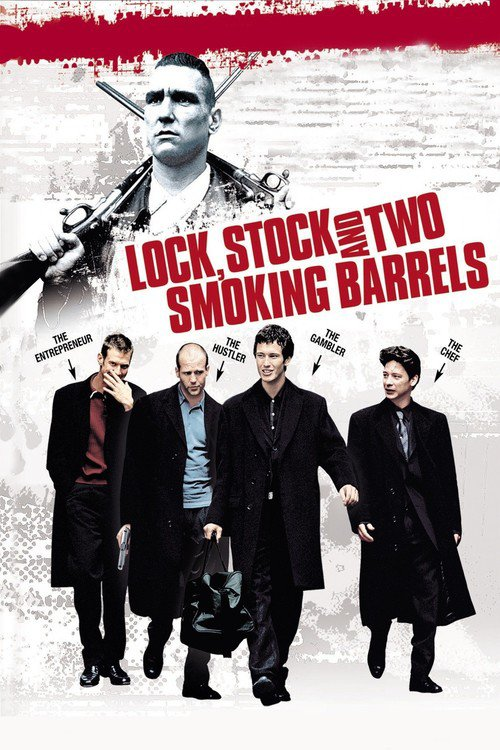

In [19]:
movie = getMovieByIMDBId("tt0120735")
print "Genres for " + movie[0]['title'] + " include: " 
print movie[0]['genre_ids']
poster_local_filname = getMoviePoster(movie[0])
Image(poster_local_filname)

Genres for The Bourne Ultimatum include: 
[28, 18, 9648, 53]


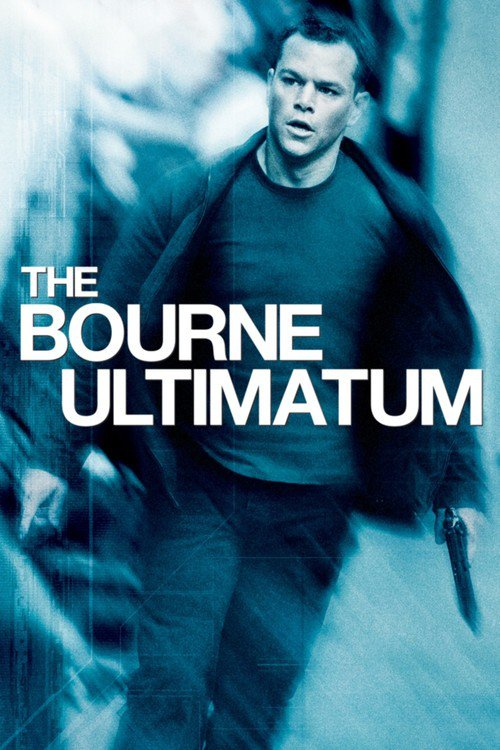

In [20]:
movie = getMovieByString("The Bourne Ult")
print "Genres for " + movie[0]['title'] + " include: " 
print movie[0]['genre_ids']
poster_local_filname = getMoviePosterByPath(movie[0]['poster_path'], movie[0]['title'])
Image(poster_local_filname)

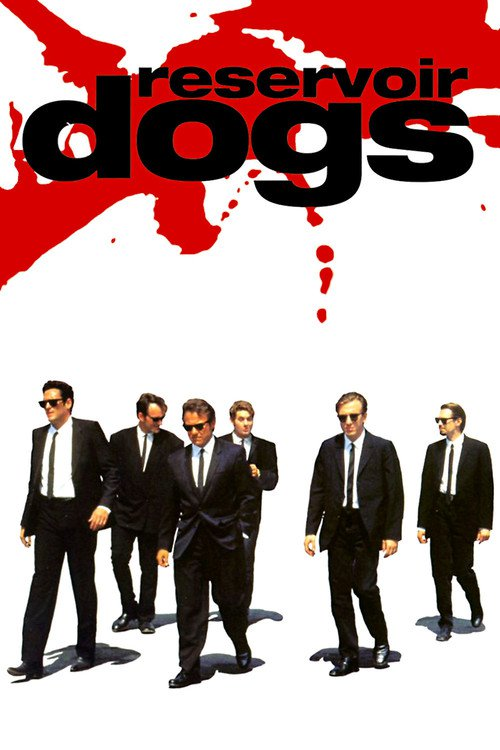

In [22]:
movie = getMovieByTMDBId(500)
poster_local_filname = getMoviePoster(movie)
Image(poster_local_filname)